31181


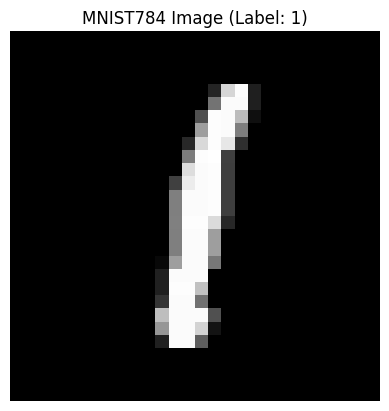

In [3]:
import openml
import matplotlib.pyplot as plt
import numpy as np
# Fetch the MNIST784 dataset from OpenML
dataset = openml.datasets.get_dataset(554, download_data=False,download_qualities=False, download_features_meta_data=False)

# Get the data as a pandas dataframe
df, *_ = dataset.get_data()

# Display one random image from the dataset
import random
random_idx = random.randint(0, len(df)- 1)
random_image = df.iloc[random_idx, :-1].values.astype(np.float32).reshape(28, 28) # Convert to float32
print(random_idx)
# Plot the image
plt.imshow(random_image, cmap="gray")
plt.title(f"MNIST784 Image (Label: {df.iloc[random_idx,-1]})")
plt.axis("off")
plt.show()

In [4]:
# Representative List of "Good looking" MNIST Images
idx_list = [65223, 53589, 42820, 67231, 69885, 13231, 60713]

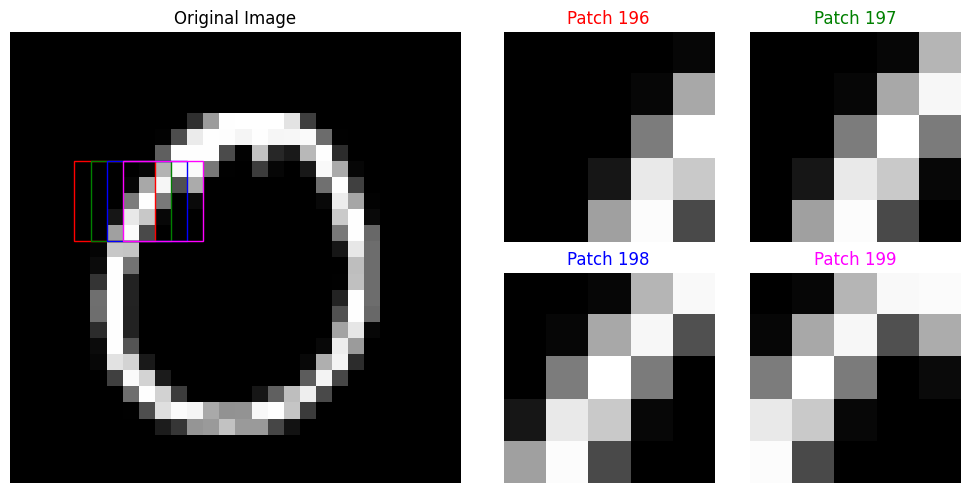

In [5]:
def extract_patches(image, patch_size=3, stride=1):

    patches = []
    # Calculate how many patches we can extract in both dimensions
    for i in range(0, image.shape[0]- patch_size + 1, stride):
        for j in range(0, image.shape[1]- patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return patches

mnist_image_example = df.iloc[60713, :-1].values.astype(np.float32).reshape(28, 28)

# Extract 3x3 patches
patches = extract_patches(mnist_image_example, patch_size=5,stride=1)

# Verify the total number of patches and the shape of the first patch
total_patches = len(patches)
patch_shape = patches[0].shape if patches else None

total_patches, patch_shape

def visualize_patches_with_colored_titles(image, patches,  start_index=0, patch_size=5, stride=1):
    colors = ["red", "green", "blue", "magenta"]
    fig = plt.figure(figsize=(10, 5))
    # Plot the original image with highlighted patches
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(image, cmap="gray")
    ax1.set_title("Original Image")
    ax1.axis("off")
    
    # Draw rectangles around the patches in different colors
    num_patches_per_row = image.shape[1]- patch_size + 1
    for i in range(4):
        if start_index + i < len(patches):
            row = (start_index + i) // num_patches_per_row *stride
            col = (start_index + i) % num_patches_per_row *stride
            rect = plt.Rectangle((col-0.5, row-0.5), patch_size,patch_size, linewidth=1, edgecolor=colors[i], facecolor="none")
            ax1.add_patch(rect)
        
    # Adjust subplot for the patches
    ax2 = fig.add_subplot(2, 4, 3)
    ax3 = fig.add_subplot(2, 4, 4)
    ax4 = fig.add_subplot(2, 4, 7)
    ax5 = fig.add_subplot(2, 4, 8)
    axs = [ax2, ax3, ax4, ax5]
    
    # Plot each of the 4 patches in the adjusted subplot positions with title colors matching the rectangles
    for i, ax in enumerate(axs):
        patch_index = start_index + i
        if patch_index < len(patches):
            ax.imshow(patches[patch_index], cmap="gray")
            ax.set_title(f"Patch {patch_index}", color=colors[i])
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    
# Try again with the color-coordinated titles
visualize_patches_with_colored_titles(mnist_image_example,patches, start_index=196)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patchesas

AttributeError: 'list' object has no attribute 'Rectangle'

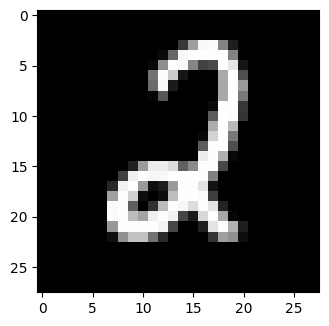

In [7]:
# Adjusted to specify just the top-left corner and the side length of the square
square_params = {2518: ((10.5, 13.5), 8), # Top-left (x, y) and side length for the "2"
31540: ((10.5, 11.5), 8), # Top-left (x, y) and side length for the "8"
}

plt.figure(figsize=(8, 4))
for i, idx in enumerate([2518, 31540]):
    plt.subplot(1, 2, i + 1)
    image_data = df.drop(columns=["class"]).iloc[idx].values.reshape(28, 28)
    plt.imshow(image_data, cmap="gray")
    
    top_left, side_length = square_params[idx]
    
    patch = patches.Rectangle(top_left, side_length, side_length,linewidth=1, edgecolor="r", facecolor="none")
    plt.gca().add_patch(patch)
    
    plt.title(f"Index: {idx}")
    plt.axis("off")
    
plt.show()
 
def extract_patches(image, patch_size=3, stride=1):
    patches = []
    for i in range(0, image.shape[0]- patch_size + 1, stride):
        for j in range(0, image.shape[1]- patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return patches

mnist_image_example = df.iloc[60713, :-1].values.astype(np. float32).reshape(28, 28)
patches = extract_patches(mnist_image_example, patch_size=5, stride=1)

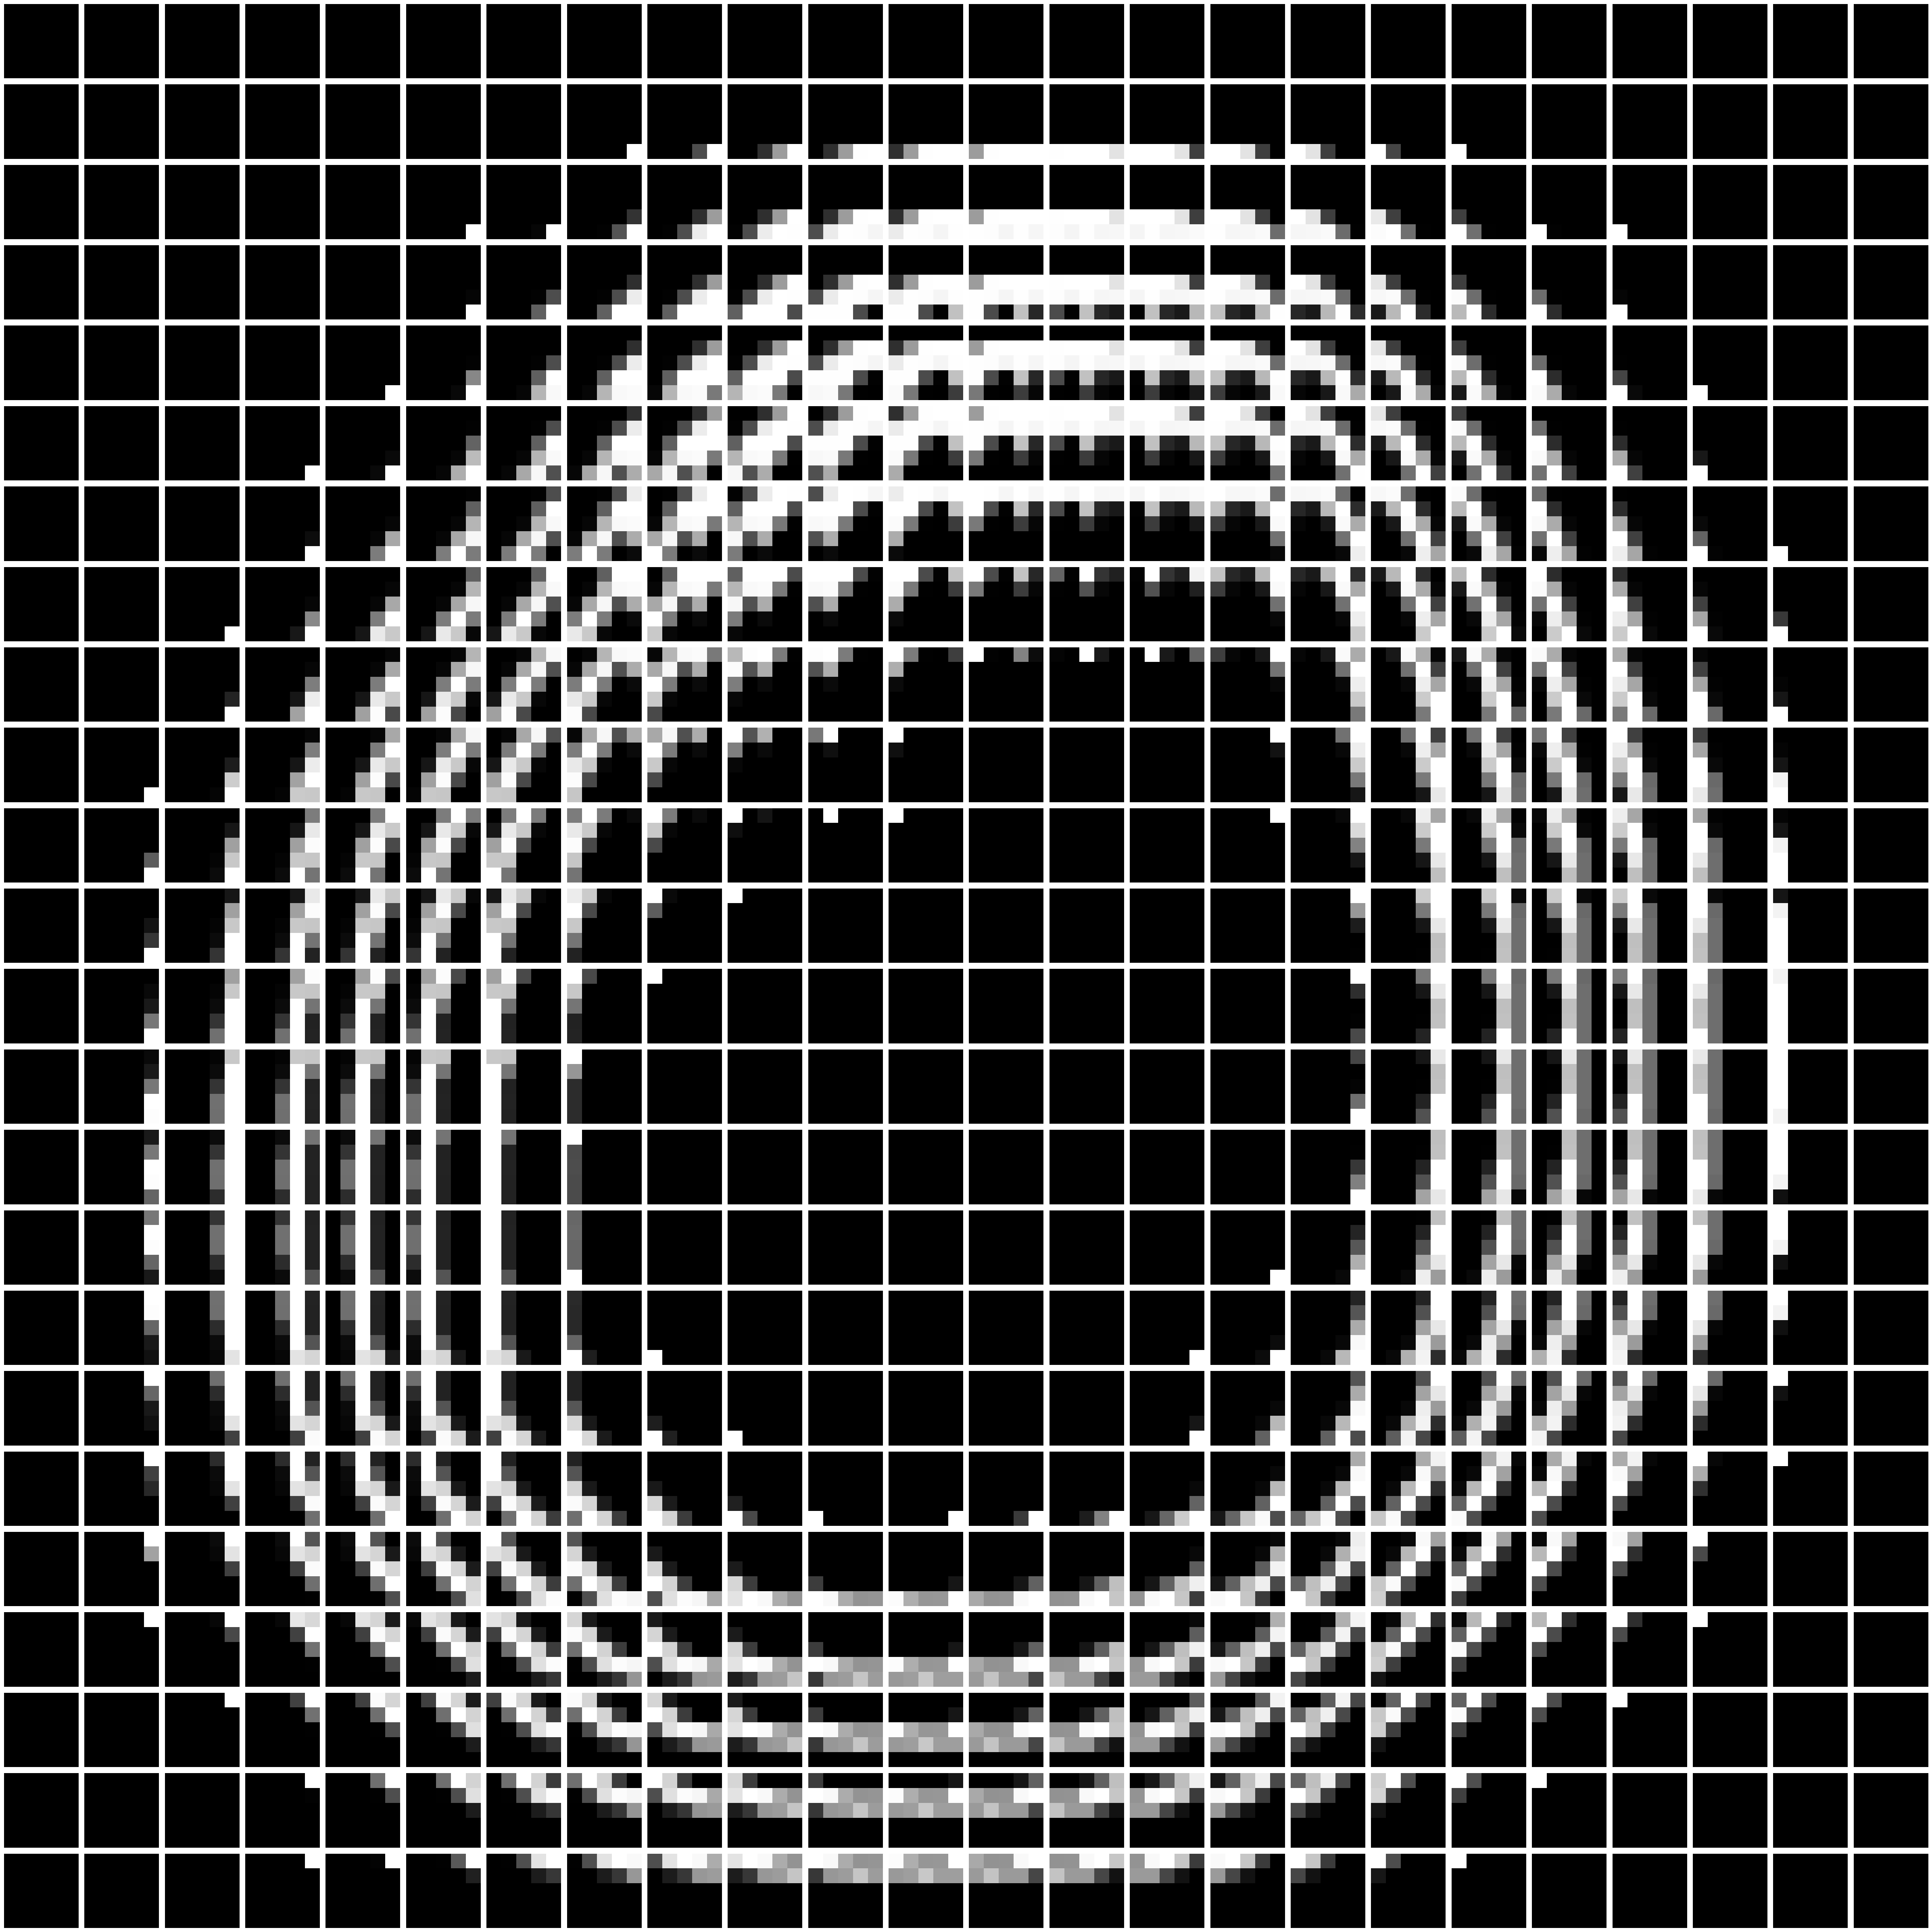

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_patches(patches, patch_size=16):
    total_patches = len(patches)
    grid_size = int(np.ceil(np.sqrt(total_patches)))
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    
    if total_patches == 1:
        axs = np.array([[axs]])
    elif grid_size == 1:
        axs = np.expand_dims(axs, 0)
        
    for i in range(grid_size ** 2):
        row = i // grid_size
        col = i % grid_size
        if i < total_patches:
            axs[row, col].imshow(patches[i], cmap="gray", aspect= "auto")
            axs[row, col].axis("off")
        else:
            axs[row, col].axis("off")
    
    plt.tight_layout()
    plt.show()
    
visualize_patches(patches, patch_size=5)

In [10]:
import openml
import numpy as np
import tensorflow as tf
import gpflow
from gpflow.kernels import Kernel
from gpflow.utilities import positive
from sklearn.model_selection import train_test_split

In [11]:
mnist = openml.datasets.get_dataset(554, download_data=True)
X, y, _, attribute_names = mnist.get_data(target=mnist.default_target_attribute)

X_np = np.array(X)
mnist_subset_n = 50

X_small = X_np[:mnist_subset_n] # Taking the first 10 images
y_small = y[:mnist_subset_n].astype(np.float64)

X_small_reshaped = X_small.reshape(-1, 28, 28, 1) / 255.0

X_small_flat = X_small_reshaped.reshape(-1, 28*28)

X_train, X_test, y_train, y_test = train_test_split(X_small_flat, y_small, test_size=0.2, random_state=42)

In [13]:
class Conv(Kernel):
    def __init__(self, basekern, img_size, patch_size, colour_channels=1):
        super().__init__()
        
        self.img_size = img_size
        self.patch_size = patch_size
        self.basekern = basekern
        self.colour_channels = colour_channels
        
        self.num_patches = ((self.img_size[0]- self.patch_size[0] + 1) *(self.img_size[1]- self.patch_size[1] + 1) *colour_channels)
        
        self.basekern.active_dims = slice(0, np.prod(patch_size)* colour_channels)
        
    def _reshape_X(self, X):
        return tf.reshape(X, (-1, self.img_size[0], self.img_size[1], self.colour_channels))
    
    def _extract_patches(self, X):
        X_reshaped = self._reshape_X(X)
        patches = tf.image.extract_patches(images=X_reshaped,sizes=[1, self.patch_size[0], self.patch_size[1], 1], strides=[1, 1, 1, 1],rates=[1, 1, 1, 1], padding="VALID")

        patch_dim = self.patch_size[0] * self.patch_size[1] *self.colour_channels
        return tf.reshape(patches, [-1, self.num_patches,patch_dim])
    
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
            
        patches_X = self._extract_patches(X)
        patches_X2 = self._extract_patches(X2)
        
        patches_X_flat = tf.reshape(patches_X, [-1, tf.shape(patches_X)[-1]])
        patches_X2_flat = tf.reshape(patches_X2, [-1, tf.shape(patches_X2)[-1]])
        
        K_matrix = self.basekern.K(patches_X_flat, patches_X2_flat)
        
        K_matrix_reshaped = tf.reshape(K_matrix, [tf.shape(X)[0],self.num_patches, tf.shape(X2)[0], self.num_patches])
         
        return tf.reduce_sum(K_matrix_reshaped, axis=[1, 3]) / (self.num_patches ** 2)
    
    
    def K_diag(self, X):
        patches_X = self._extract_patches(X)
        patches_X_flat = tf.reshape(patches_X, [-1, tf.shape(patches_X)[-1]])
        
        K_diag = self.basekern.K_diag(patches_X_flat)
        
        return tf.reduce_sum(tf.reshape(K_diag, [tf.shape(X)[0], self.num_patches]), axis=1) / self.num_patches

In [14]:
base_kernel = gpflow.kernels.SquaredExponential()
conv_kernel = Conv(basekern=base_kernel, img_size=(28, 28), patch_size=(3, 3), colour_channels=1)
 
y_train_np = y_train.to_numpy()[:, None]

model = gpflow.models.GPR(data=(X_train, y_train_np), kernel=conv_kernel, mean_function=None)

gpflow.utilities.print_summary(model)

╒══════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                             │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞══════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.basekern.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├──────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.basekern.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├──────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance          │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │       1 │
╘═══════════════════════

In [15]:
import time

In [16]:
start_time = time.time()
opt = gpflow.optimizers.Scipy()

opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))
end_time = time.time()

opt_time = end_time- start_time

print(f" Time taken to optimise is {opt_time:.3f} for subset size of {mnist_subset_n}")

 Time taken to optimise is 143.363 for subset size of 50


In [17]:
mean, var = model.predict_y(X_test)
pred_labels = np.round(mean.numpy()).astype(int)

end_pred_time = time.time()- end_time

print(f" Time taken to predict is {end_pred_time:.3f} for subset size of {mnist_subset_n}")

 Time taken to predict is 2.985 for subset size of 50


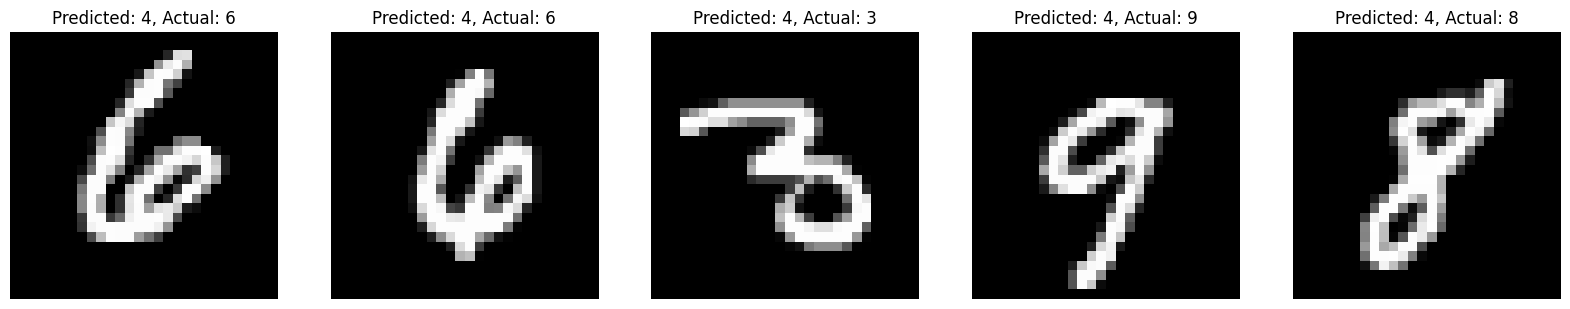

In [18]:
n_images = 5
fig, axes = plt.subplots(1, n_images, figsize=(20, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {pred_labels[i][0]}, Actual: {y_test.iloc[i]:.0f}")
    ax.axis("off")
    
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred_labels)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.100
